# Analyse exploratoire


In [1]:
pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pyarrow.parquet as pq

table = pq.read_table('yellow_tripdata_2023-03.parquet')
df=table.to_pandas()
df.head()

FileNotFoundError: ignored

In [ ]:
print("Nombre de lignes : " , df.shape[0])
print("Nombre de variables : ",df.shape[1])

Nombre de lignes :  3403766
Nombre de variables :  19


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [ ]:
df = df.drop(['fare_amount','extra','mta_tax','tip_amount','tolls_amount','congestion_surcharge','Airport_fee','improvement_surcharge','RatecodeID','store_and_fwd_flag','VendorID'],axis=1)

In [ ]:
print('Nombre de valeurs manquantes :')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Nombre de valeurs manquantes :
	tpep_pickup_datetime: 0
	tpep_dropoff_datetime: 0
	passenger_count: 87619
	trip_distance: 0
	PULocationID: 0
	DOLocationID: 0
	payment_type: 0
	total_amount: 0


#### Il y'a 87619 lignes qui contiennent des valeurs manquantes dans la colonne passenger_count et store_and_flag nous allons donc les supprimer vu qu'ils representent que 2,57% des données 

In [ ]:
df.dropna(inplace=True)
df.shape

(3316147, 8)

## Les valeurs aberrantes

In [ ]:
# Types du jeu de données 
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

<Axes: >

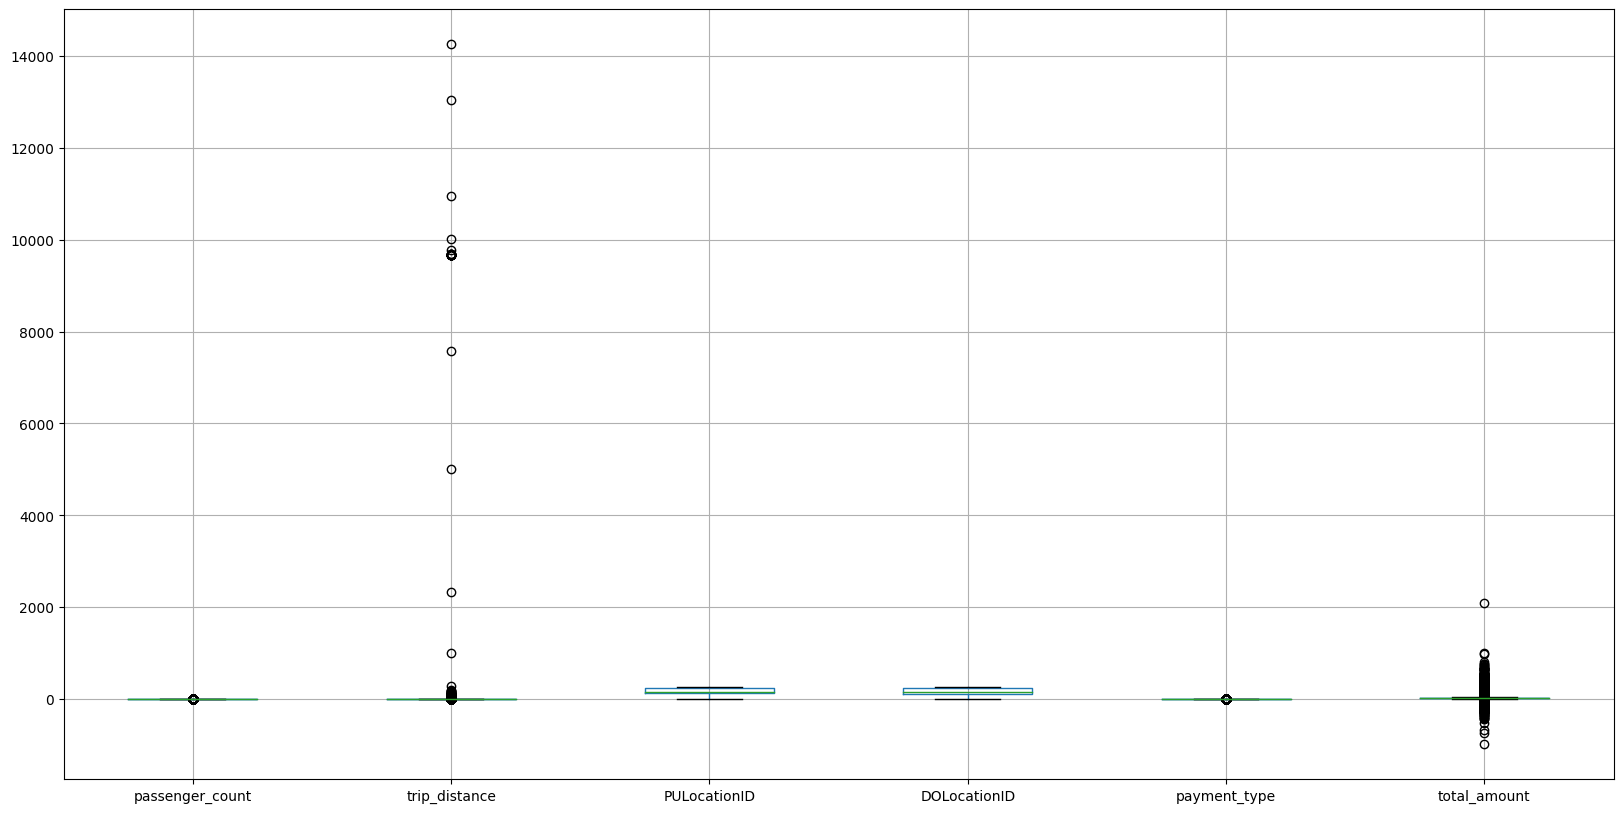

In [ ]:
# On va convertir certaines valeurs en numérique
col = ['passenger_count','trip_distance','PULocationID','DOLocationID','payment_type','total_amount']
df[col].boxplot(figsize=(20,10))

#### On constate qu'il y a des valeurs aberrantes pour trip distance et total_amount

Prix maximum : 2100.0
Prix minimum : -982.95


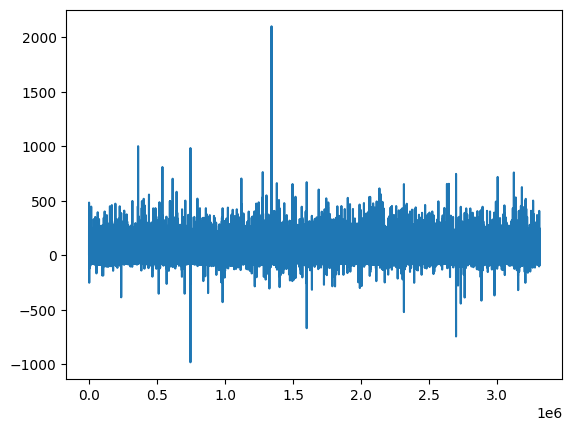

In [ ]:
# 'total_amount'

df['total_amount'].plot()
#données aberrantes
print('Prix maximum : '+str(df['total_amount'].max()))
print('Prix minimum : '+str(df['total_amount'].min()))

#### En visualisant total amount on constate qu'il y a des montants négatifs et des montants qui dépassent 2000. Nous allons commencer par supprimer les lignes sur lesquels le montant est négatif 

#### D'aprés le site www.new-york.fr le tarif minimum d'un taxi est de 3 dollars, nous allons donc supprimer tout les tarifs < à cette valeurs 

In [ ]:
#Suppression des lignes avec prix inférieur à 0$ : seulement 0.9% du fichier
df=df[df['total_amount']>=3]

Prix maximum : 2100.0
Prix minimum : 3.0


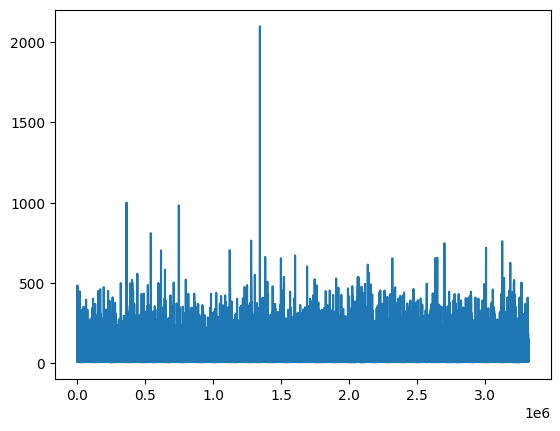

In [ ]:
# 'total_amount'

df['total_amount'].plot()
#données aberrantes
print('Prix maximum : '+str(df['total_amount'].max()))
print('Prix minimum : '+str(df['total_amount'].min()))

In [ ]:
df[df['total_amount']>=800]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
361044,2023-03-04 09:30:52,2023-03-04 09:42:20,1.0,2.30,226,83,1,1000.00
539814,2023-03-05 21:55:13,2023-03-06 15:22:22,1.0,13.00,265,3,2,809.10
745928,2023-03-07 23:03:14,2023-03-08 02:10:29,1.0,144.96,132,265,4,982.95
1342230,2023-03-13 14:51:52,2023-03-13 14:51:52,0.0,0.00,264,264,1,2100.00


#### Au vue de ce tableau ci dessus certaines données ayant des valeurs abbérantes au niveau du payement sont correcte et d'autres non

Prix maximum : 982.95
Prix minimum : 3.0


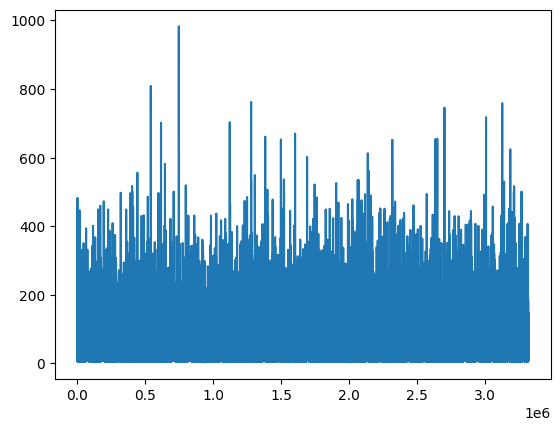

In [ ]:
df = df[df['total_amount'] < 1000]

df['total_amount'].plot()
#données aberrantes
print('Prix maximum : '+str(df['total_amount'].max()))
print('Prix minimum : '+str(df['total_amount'].min()))           


In [ ]:
df[df['total_amount']>=500]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
402144,2023-03-04 16:20:55,2023-03-04 16:21:01,3.0,0.00,265,265,2,517.35
403196,2023-03-04 16:35:22,2023-03-04 16:35:34,1.0,0.00,265,100,2,501.00
440681,2023-03-04 22:29:26,2023-03-05 10:58:06,1.0,2.46,70,70,2,540.95
441039,2023-03-04 22:32:38,2023-03-04 22:34:35,1.0,0.00,265,265,1,556.00
539814,2023-03-05 21:55:13,2023-03-06 15:22:22,1.0,13.00,265,3,2,809.10
614997,2023-03-06 19:36:10,2023-03-07 09:30:37,1.0,45.34,10,10,2,701.65
644013,2023-03-07 07:01:07,2023-03-07 08:54:21,1.0,80.40,132,265,1,581.75
708132,2023-03-07 17:45:07,2023-03-07 17:45:19,1.0,0.00,1,1,2,501.00
708133,2023-03-07 17:48:14,2023-03-07 17:48:23,1.0,0.00,1,1,2,500.00
745928,2023-03-07 23:03:14,2023-03-08 02:10:29,1.0,144.96,132,265,4,982.95


#### Nous pouvons constater que la variable Trip distance contient des valeurs = 0 sachant que le total amounts est > 0

In [ ]:
df=df[df['trip_distance']>0]

distance maximum : 14257.91
distance minimum : 0.01


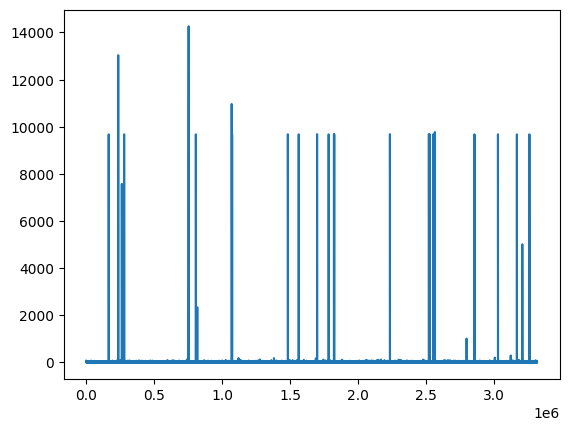

In [ ]:
# Trip_Distance

df['trip_distance'].plot()
#données aberrantes
print('distance maximum : '+str(df['trip_distance'].max()))
print('distance minimum : '+str(df['trip_distance'].min()))           


In [ ]:
df[df['trip_distance']>240]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
165836,2023-03-02 15:45:34,2023-03-02 16:00:45,1.0,9674.01,161,68,1,20.20
236005,2023-03-03 06:04:19,2023-03-03 06:19:43,1.0,13032.40,75,142,1,18.76
262282,2023-03-03 12:01:53,2023-03-03 12:12:38,1.0,7571.55,162,163,1,18.48
279590,2023-03-03 15:39:12,2023-03-03 16:00:02,1.0,9676.40,87,112,1,33.60
752920,2023-03-08 06:41:30,2023-03-08 07:24:04,1.0,10011.29,132,61,1,66.29
753670,2023-03-08 06:33:33,2023-03-08 07:03:31,1.0,14257.91,82,75,1,35.17
806684,2023-03-08 15:49:52,2023-03-08 16:00:20,1.0,9675.23,138,260,1,24.65
817410,2023-03-08 17:33:44,2023-03-08 18:01:40,1.0,2335.96,161,255,1,46.63
1070240,2023-03-10 19:12:22,2023-03-10 19:18:55,1.0,10961.43,140,263,2,15.10
1073514,2023-03-10 19:48:23,2023-03-10 20:02:28,1.0,9673.99,161,229,1,23.16


#### En général un taxi roule entre 120 et 240 Km par jour Nous allons dans un premier temps supprimer tous les trajets supérieur à 240 km et  inférieur à 0,32 km (le minimum)

In [ ]:
df= df[df['trip_distance']<240]


In [ ]:
df= df[df['trip_distance']>0.32]

distance maximum : 198.07
distance minimum : 0.33


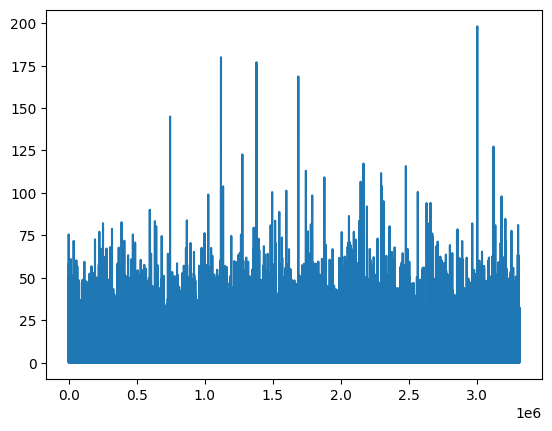

In [ ]:
# Trip_Distance

df['trip_distance'].plot()
#données aberrantes
print('distance maximum : '+str(df['trip_distance'].max()))
print('distance minimum : '+str(df['trip_distance'].min()))  

In [ ]:
# Dimmension 
df.shape

(3207236, 8)

<Axes: >

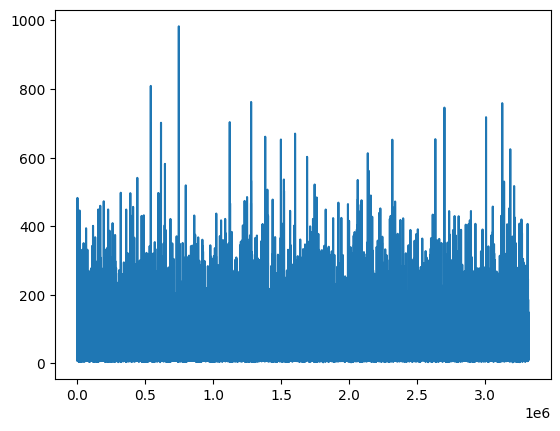

In [ ]:
df['total_amount'].plot()

In [ ]:
#(df['total_amount']>800).value_counts()

False    3207234
True           2
Name: total_amount, dtype: int64

In [ ]:
#Suppression de la ligne avec prix égal à 2100$ : valeur aberrante
#df=df[df['total_amount']<=800]

<Axes: >

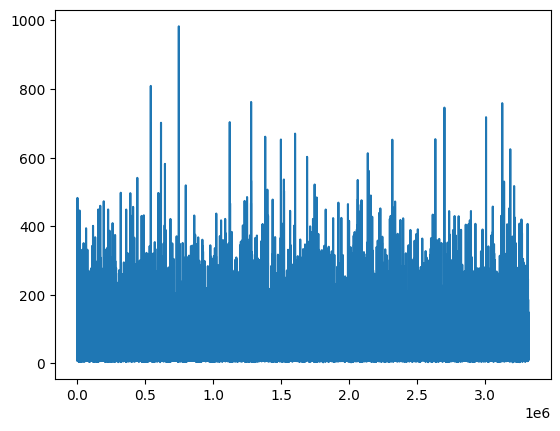

In [ ]:
df['total_amount'].plot()

In [ ]:
df['durée']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,durée
1,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,138,231,1,76.49,0 days 00:31:05
2,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,140,186,1,28.05,0 days 00:14:22
3,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,140,43,1,24.70,0 days 00:11:28
4,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,79,137,1,14.64,0 days 00:03:02
5,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,162,137,1,18.00,0 days 00:08:25


In [ ]:
#b=df['durée'].dt.total_seconds()/3600
#b

In [ ]:
df['mois'] = df.tpep_pickup_datetime.dt.month
df['jour'] = df.tpep_pickup_datetime.dt.day
df['jour_semaine'] = df.tpep_pickup_datetime.dt.weekday
df['annee'] = df.tpep_pickup_datetime.dt.year
df['heure'] = df.tpep_pickup_datetime.dt.hour
df['minute'] = df.tpep_pickup_datetime.dt.minute

# à lancer

In [ ]:
df['duree_minute'] = df.durée.dt.total_seconds()/60
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,durée,mois,jour,jour_semaine,annee,heure,minute,durée2,duree_minute
1,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,138,231,1,76.49,0 days 00:31:05,3,1,2,2023,0,8,00:31:05,31.083333
2,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,140,186,1,28.05,0 days 00:14:22,3,1,2,2023,0,15,00:14:22,14.366667
3,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,140,43,1,24.70,0 days 00:11:28,3,1,2,2023,0,49,00:11:28,11.466667
4,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,79,137,1,14.64,0 days 00:03:02,3,1,2,2023,0,8,00:03:02,3.033333
5,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,162,137,1,18.00,0 days 00:08:25,3,1,2,2023,0,9,00:08:25,8.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316142,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,236,142,1,19.68,0 days 00:08:01,3,31,4,2023,23,56,00:08:01,8.016667
3316143,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,48,48,1,12.12,0 days 00:02:45,3,31,4,2023,23,3,00:02:45,2.750000
3316144,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,68,114,1,24.72,0 days 00:16:54,3,31,4,2023,23,18,00:16:54,16.900000
3316145,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,114,137,1,17.70,0 days 00:08:45,3,31,4,2023,23,36,00:08:45,8.750000


In [ ]:
def format_duree_trajet(row):
    heures = row['durée'].seconds // 3600
    minutes = (row['durée'].seconds % 3600) // 60
    secondes = row['durée'].seconds % 60
    return f"{heures:02d}:{minutes:02d}:{secondes:02d}"

df['durée2'] = df.apply(format_duree_trajet, axis=1)


In [ ]:
df['durée2']=df['durée2'].astype(int)

ValueError: ignored

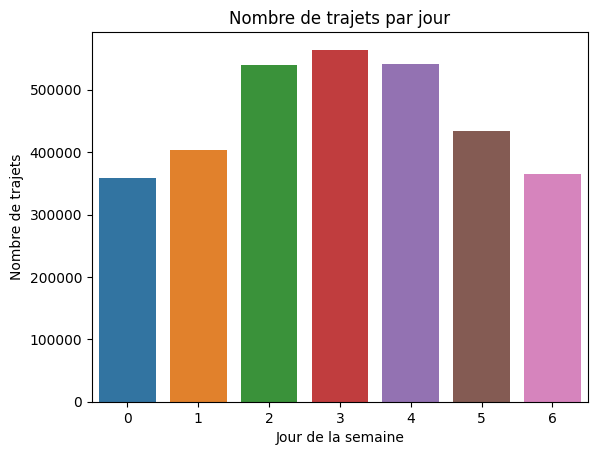

In [ ]:
sns.countplot(x='jour_semaine', data=df)
#sns.countplot(x='jour_semaine',hue='Vendor_ID', data=df)
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de trajets')
plt.title('Nombre de trajets par jour')
plt.xticks(rotation=0)
plt.show()


In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,durée,mois,jour,jour_semaine,annee,heure,minute,durée2
1,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,138,231,1,76.49,0 days 00:31:05,3,1,2,2023,0,8,00:31:05
2,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,140,186,1,28.05,0 days 00:14:22,3,1,2,2023,0,15,00:14:22
3,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,140,43,1,24.70,0 days 00:11:28,3,1,2,2023,0,49,00:11:28
4,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,79,137,1,14.64,0 days 00:03:02,3,1,2,2023,0,8,00:03:02
5,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,162,137,1,18.00,0 days 00:08:25,3,1,2,2023,0,9,00:08:25


<Axes: >

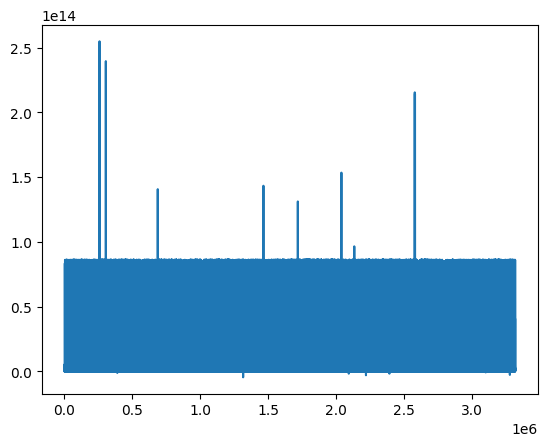

In [ ]:
import pandas as pd
#df['durée_course']=pd.to_datetime(df['durée'].astype('datetime64[D]'),format='%H:%M:%S')
#df['DateTime'] = df.Date.dt.strftime('%Y-%m-%d %S:%M:%H')

df['durée'].plot()

XGBoost

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,durée,mois,jour,jour_semaine,annee,heure,minute,durée2
1,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,138,231,1,76.49,0 days 00:31:05,3,1,2,2023,0,8,00:31:05
2,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,140,186,1,28.05,0 days 00:14:22,3,1,2,2023,0,15,00:14:22
3,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,140,43,1,24.70,0 days 00:11:28,3,1,2,2023,0,49,00:11:28
4,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,79,137,1,14.64,0 days 00:03:02,3,1,2,2023,0,8,00:03:02
5,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,162,137,1,18.00,0 days 00:08:25,3,1,2,2023,0,9,00:08:25


In [ ]:
# Séparation des features et de la target 
X = df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','total_amount','payment_type','durée','durée2'])
y = df['total_amount']

In [ ]:
X.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,mois,jour,jour_semaine,annee,heure,minute,duree_minute
1,2.0,12.40,138,231,3,1,2,2023,0,8,31.083333
2,0.0,3.30,140,186,3,1,2,2023,0,15,14.366667
3,1.0,2.90,140,43,3,1,2,2023,0,49,11.466667
4,1.0,1.23,79,137,3,1,2,2023,0,8,3.033333
5,1.0,1.20,162,137,3,1,2,2023,0,9,8.416667


In [ ]:
X.passenger_count.value_counts()

1.0    2440681
2.0     465252
3.0     114484
4.0      56475
0.0      55890
5.0      45749
6.0      28703
8.0          1
7.0          1
Name: passenger_count, dtype: int64

In [ ]:
import numpy as np
print("Taille de l'ensemble de données :", X.shape)
print("Nombre d'échantillons : ", X.shape [0])
print("Nombre de features : ", X.shape [1])

Taille de l'ensemble de données : (3207236, 11)
Nombre d'échantillons :  3207236
Nombre de features :  11


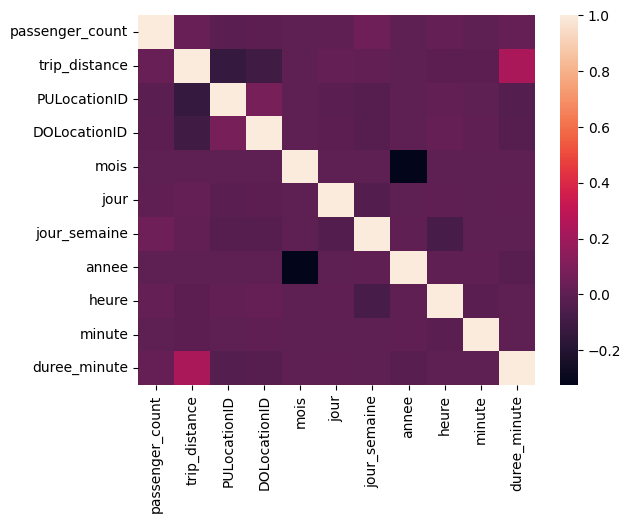

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr()
sns.heatmap(corr)
plt.show()

In [ ]:
# Importer les bibliothèques nécessaires
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.dtypes

passenger_count    float64
trip_distance      float64
PULocationID         int32
DOLocationID         int32
mois                 int64
jour                 int64
jour_semaine         int64
annee                int64
heure                int64
minute               int64
duree_minute       float64
dtype: object

In [ ]:
# Créer un objet DMatrix pour les données XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Définir les hyperparamètres du modèle
params = {
    "max_depth": 3,
    "eta": 0.1,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "seed": 42
}

In [ ]:
# Entraîner le modèle
num_rounds = 50
model = xgb.train(params, dtrain, num_rounds)

In [ ]:
# Faire des prédictions sur l'ensemble de test
preds = model.predict(dtest)

In [ ]:
"""# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]


# Calculer la précision de la classification
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: %.2f%%" % (accuracy * 100.0))"""

In [ ]:
"""# Évaluer les performances du modèle
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))"""

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Calculer l'erreur quadratique moyenne (RMSE) des prédictions
rmse = mean_squared_error(y_test, preds, squared=False)
print("RMSE:", rmse)

RMSE: 5.2204992698965835


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)

print(f"RMSE : {rmse}")
print(f"R2 : {r2}")

RMSE : 5.2204992698965835
R2 : 0.9441689688089142


In [ ]:
"""# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
#passenger_count	trip_distance	PULocationID	DOLocationID	mois	jour	jour_semaine	annee	heure	minute	duree_minute
#passenger_count	PULocationID	DOLocationID	date_aller (extraire de la date_aller : mois	jour	jour_semaine	annee	heure	minute)	
new_data = asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)"""

Réseaux de neurones

In [ ]:
"""#Normalisation des données ( je sais pas si nécessaire)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)"""

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définir le modèle
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear')) # Couche de sortie 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiler le modèle
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Entraîner le modèle
history=model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

KeyboardInterrupt: ignored

In [ ]:
# Visualisation de la courbe d'apprentissage et de validation
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # fonction de perte (loss) 
#plt.plot(history.history['mse']) # Métrique de performance
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Évaluer le modèle
mse = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.2f' % mse)

In [ ]:
# Faire des prédictions (fonction predict())
predictions = model.predict(X_test)
# Afficher les résultats
for i in range(10):
    print('Prediction: %.2f, Vraie valeur: %.2f' % (predictions[i], np.array([y_test[i]])))